In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

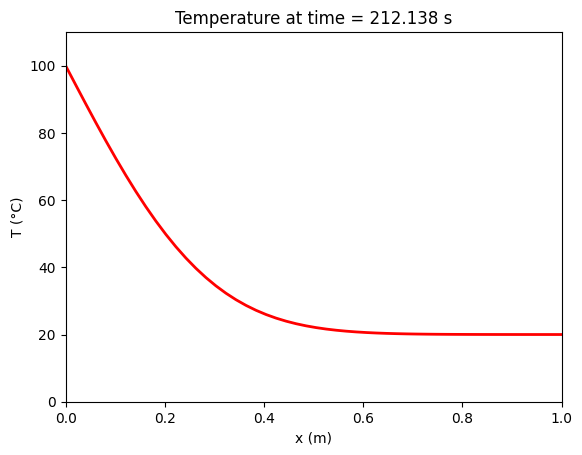

In [1]:
# Parámetros
L = 1.0
alpha = 0.00012
Nx = 100
dx = L / (Nx - 1)
dt = 0.5 * dx**2 / alpha
Nt = 500

# Verificación de estabilidad
lambda_ = alpha * dt / dx**2
assert lambda_ <= 0.5, "Condición de estabilidad no satisfecha"

# Malla y condición inicial
x = np.linspace(0, L, Nx)
T = np.ones(Nx) * 20
T[0] = 100  # Condición de frontera izquierda

# Configurar gráfica
fig, ax = plt.subplots()
line, = ax.plot(x, T, 'r-', linewidth=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 110)
ax.set_xlabel("x (m)")
ax.set_ylabel("T (°C)")
title = ax.set_title("Temperature at time = 0.000 s")

# Función de actualización
def update(frame):
    global T
    T_new = T.copy()

    # Interior
    for i in range(1, Nx - 1):
        T_new[i] = lambda_ * T[i + 1] + (1 - 2 * lambda_) * T[i] + lambda_ * T[i - 1]

    # Condición de frontera izquierda
    T_new[0] = 100

    # Condición de frontera derecha (aislada): T_{N}^{j+1} = T_{N-2}^{j}
    T_new[-1] = T[-3]

    T[:] = T_new
    line.set_ydata(T)
    title.set_text(f"Temperature at time = {frame * dt:.3f} s")
    return line, title

# Animación
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)

# Guardar como gif
ani.save("heat_isolated_edge_reflection.gif", writer=animation.PillowWriter(fps=20))

plt.show()